In [2]:
from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
import pandas as pd
df = pd.read_csv('drug200.csv')

In [4]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [5]:
df.shape

(200, 6)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [7]:
df.isna().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

## Seperate X and Y values

In [8]:
X = df.drop(labels=['Drug'],axis=1)
Y = df[['Drug']]

In [9]:
X.head()

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,F,HIGH,HIGH,25.355
1,47,M,LOW,HIGH,13.093
2,47,M,LOW,HIGH,10.114
3,28,F,NORMAL,HIGH,7.798
4,61,F,LOW,HIGH,18.043


In [10]:
Y.head()

,Drug
0,DrugY
1,drugC
2,drugC
3,drugX
4,DrugY


### Apply Label Encoding on Y values

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y['Drug'] = le.fit_transform(Y['Drug'])
Y.head()

,Drug
0,0
1,3
2,3
3,4
4,0


In [12]:
Y.value_counts()

Drug
0       91
4       54
1       23
2       16
3       16
Name: count, dtype: int64

### Preprocessing on X Features

In [13]:
cat = list(X.columns[X.dtypes=='object'])
con = list(X.columns[X.dtypes!='object'])

In [14]:
cat

['Sex', 'BP', 'Cholesterol']

In [15]:
con

['Age', 'Na_to_K']

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [17]:
num_pipe = Pipeline(steps=[('imputer', SimpleImputer(strategy='mean')),
                           ('scaler', StandardScaler())])
cat_pipe = Pipeline(steps=[('imputer',SimpleImputer(strategy='most_frequent')),
                           ('OHE', OneHotEncoder(handle_unknown='ignore'))])
pre = ColumnTransformer([('num', num_pipe,con),
                         ('cat',cat_pipe,cat)])

In [18]:
X_pre = pre.fit_transform(X)
X_pre

array([[-1.29159102,  1.28652212,  1.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.16269866, -0.4151454 ,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.16269866, -0.82855818,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 0.46567567, -0.85908883,  0.        , ...,  1.        ,
         1.        ,  0.        ],
       [-1.29159102, -0.28650033,  0.        , ...,  1.        ,
         0.        ,  1.        ],
       [-0.26146916, -0.6571702 ,  1.        , ...,  0.        ,
         0.        ,  1.        ]])

In [19]:
cols = pre.get_feature_names_out()
cols

array(['num__Age', 'num__Na_to_K', 'cat__Sex_F', 'cat__Sex_M',
       'cat__BP_HIGH', 'cat__BP_LOW', 'cat__BP_NORMAL',
       'cat__Cholesterol_HIGH', 'cat__Cholesterol_NORMAL'], dtype=object)

In [21]:
X_pre = pd.DataFrame(X_pre,columns=cols)
X_pre.head()

,num__Age,num__Na_to_K,cat__Sex_F,cat__Sex_M,cat__BP_HIGH,cat__BP_LOW,cat__BP_NORMAL,cat__Cholesterol_HIGH,cat__Cholesterol_NORMAL
0,-1.291591,1.286522,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.162699,-0.415145,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,0.162699,-0.828558,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,-0.988614,-1.149963,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,1.011034,0.271794,1.0,0.0,0.0,1.0,0.0,1.0,0.0


In [30]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X_pre, Y, test_size=0.2, random_state=21)

In [23]:
xtrain.shape

(160, 9)

In [24]:
xtest.shape

(40, 9)

In [25]:
ytrain.shape

(160, 1)

In [26]:
ytest.shape

(40, 1)

In [27]:
ytrain.value_counts()

Drug
0       76
4       43
1       17
2       13
3       11
Name: count, dtype: int64

In [28]:
ytest.value_counts()

Drug
0       15
4       11
1        6
3        5
2        3
Name: count, dtype: int64

In [29]:
# Build the model
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=21)
model.fit(xtrain,ytrain)

RandomForestClassifier(random_state=21)

In [31]:
model.score(xtrain,ytrain)

1.0

In [43]:
model.score(xtest,ytest)

1.0

In [36]:
## Hyyperparameter tuning
params = {'n_estimators':[10,50,100,200],
         'max_depth':[2,3,4,5,6,7,8],
          'min_samples_split':[4,5,6,7,8],
           'criterion': ['gini','entropy'] }

In [37]:
from sklearn.model_selection import GridSearchCV
rfc = RandomForestClassifier(random_state=21)
gscv = GridSearchCV(rfc, param_grid = params, cv = 5, scoring='f1_macro')
gscv.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=21),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8],
                         'min_samples_split': [4, 5, 6, 7, 8],
                         'n_estimators': [10, 50, 100, 200]},
             scoring='f1_macro')

In [38]:
gscv.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'min_samples_split': 6,
 'n_estimators': 10}

In [39]:
gscv.best_score_

1.0

In [40]:
best_rfc = gscv.best_estimator_
best_rfc

RandomForestClassifier(criterion='entropy', max_depth=5, min_samples_split=6,
                       n_estimators=10, random_state=21)

In [41]:
best_rfc.score(xtrain,ytrain)

1.0

In [42]:
best_rfc.score(xtest,ytest)

0.925

In [44]:
## predict the values
ypred_tr = model.predict(xtrain)
ypred_ts = model.predict(xtest)

In [45]:
ypred_tr[0:5]

array([1, 4, 4, 4, 4])

In [46]:
ypred_ts[0:5]

array([1, 0, 1, 0, 4])

In [47]:
ytrain.head()

,Drug
176,1
111,4
114,4
14,4
106,4


In [48]:
ytest.head()

,Drug
144,1
9,0
17,1
20,0
45,4


In [49]:
## Getting Original Labels
ypred_tr_lb = le.inverse_transform(ypred_tr)
ypred_ts_lb = le.inverse_transform(ypred_ts)

In [50]:
ypred_tr_lb

array(['drugA', 'drugX', 'drugX', 'drugX', 'drugX', 'drugB', 'drugX',
       'drugC', 'DrugY', 'drugX', 'drugA', 'drugA', 'drugB', 'DrugY',
       'drugX', 'DrugY', 'DrugY', 'drugX', 'DrugY', 'DrugY', 'drugA',
       'drugX', 'DrugY', 'DrugY', 'drugX', 'drugX', 'drugC', 'drugX',
       'drugA', 'DrugY', 'drugA', 'DrugY', 'DrugY', 'DrugY', 'DrugY',
       'drugX', 'DrugY', 'drugX', 'drugX', 'drugX', 'DrugY', 'DrugY',
       'DrugY', 'drugC', 'DrugY', 'DrugY', 'drugC', 'DrugY', 'DrugY',
       'drugB', 'drugX', 'drugB', 'drugA', 'drugX', 'DrugY', 'drugX',
       'DrugY', 'DrugY', 'drugB', 'drugX', 'drugA', 'drugC', 'DrugY',
       'DrugY', 'DrugY', 'drugX', 'DrugY', 'drugX', 'drugX', 'DrugY',
       'DrugY', 'drugX', 'drugX', 'DrugY', 'DrugY', 'DrugY', 'drugX',
       'drugC', 'drugB', 'drugX', 'drugC', 'drugX', 'drugX', 'DrugY',
       'drugX', 'drugC', 'DrugY', 'drugX', 'drugX', 'DrugY', 'drugX',
       'DrugY', 'DrugY', 'DrugY', 'drugX', 'DrugY', 'drugA', 'drugC',
       'drugB', 'Dru

In [51]:
ypred_ts_lb

array(['drugA', 'DrugY', 'drugA', 'DrugY', 'drugX', 'DrugY', 'DrugY',
       'DrugY', 'drugX', 'DrugY', 'DrugY', 'DrugY', 'drugX', 'drugX',
       'DrugY', 'drugX', 'drugB', 'DrugY', 'drugA', 'DrugY', 'drugB',
       'DrugY', 'DrugY', 'drugX', 'drugA', 'DrugY', 'DrugY', 'drugX',
       'drugC', 'DrugY', 'DrugY', 'DrugY', 'drugA', 'DrugY', 'drugC',
       'DrugY', 'drugB', 'DrugY', 'drugB', 'drugB'], dtype=object)

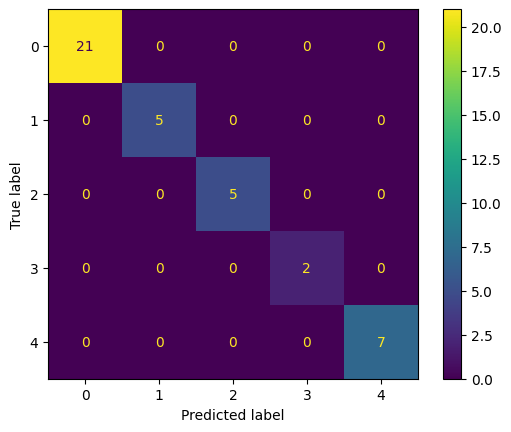

In [52]:
## confusion Matrix Testing
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cf = confusion_matrix(ytest,ypred_ts)
cfd = ConfusionMatrixDisplay(cf,display_labels=model.classes_)
cfd.plot()

In [53]:
## check classification Report
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred_ts))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         7

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



In [58]:
## predicting data for new patients
def predict_data(pre, model,le, file_path):
    xnew = pd.read_csv(file_path)
    
    # Preprocessing
    Xnew_pre = pre.transform(xnew)
    Xnew_pre = pd.DataFrame(Xnew_pre, columns=pre.get_feature_names_out())

    # Predicting
    pred = model.predict(Xnew_pre)

    # Get the actual labels
    pred_lb = le.inverse_transform(pred)

    # storing values in dataframe
    xnew['Drug_pred'] = pred_lb

    xnew.to_csv('predictions1.csv', index=False)

    return xnew



In [59]:
file_path = 'New_patients.csv'
predict_data(pre,model, le, file_path)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug_pred
0,25,F,NORMAL,HIGH,20.5,DrugY
1,35,M,HIGH,NORMAL,18.5,DrugY
2,57,M,LOW,HIGH,15.7,DrugY


In [60]:
xsample = df.sample(10)
xsample

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
110,50,M,HIGH,HIGH,7.490,drugA
133,24,M,NORMAL,HIGH,25.786,DrugY
158,59,F,LOW,HIGH,10.444,drugC
194,46,F,HIGH,HIGH,34.686,DrugY
172,39,F,NORMAL,NORMAL,17.225,DrugY
21,63,M,NORMAL,HIGH,25.917,DrugY
118,32,F,HIGH,NORMAL,10.292,drugA
156,31,M,HIGH,NORMAL,11.227,drugA
169,20,F,HIGH,HIGH,11.262,drugA
107,42,M,LOW,HIGH,20.013,DrugY


In [61]:
xsample = xsample.drop(labels=['Drug'], axis= 1)
xsample

,Age,Sex,BP,Cholesterol,Na_to_K
110,50,M,HIGH,HIGH,7.490
133,24,M,NORMAL,HIGH,25.786
158,59,F,LOW,HIGH,10.444
194,46,F,HIGH,HIGH,34.686
172,39,F,NORMAL,NORMAL,17.225
21,63,M,NORMAL,HIGH,25.917
118,32,F,HIGH,NORMAL,10.292
156,31,M,HIGH,NORMAL,11.227
169,20,F,HIGH,HIGH,11.262
107,42,M,LOW,HIGH,20.013


In [62]:
xsample.to_csv('patientsNew.csv',index=False)

In [63]:
file_path = 'patientsNew.csv'
predict_data(pre,model,le,file_path)

,Unnamed: 0,Age,Sex,BP,Cholesterol,Na_to_K,Drug_pred
0,110,50,M,HIGH,HIGH,7.490,drugA
1,133,24,M,NORMAL,HIGH,25.786,DrugY
2,158,59,F,LOW,HIGH,10.444,drugC
3,194,46,F,HIGH,HIGH,34.686,DrugY
4,172,39,F,NORMAL,NORMAL,17.225,DrugY
5,21,63,M,NORMAL,HIGH,25.917,DrugY
6,118,32,F,HIGH,NORMAL,10.292,drugA
7,156,31,M,HIGH,NORMAL,11.227,drugA
8,169,20,F,HIGH,HIGH,11.262,drugA
9,107,42,M,LOW,HIGH,20.013,DrugY
